# Capstone Two: Data Wrangling



## 1.Background
Therapeutic antibodies are very important biopharmaceutics for cancers and autoimmune diseases. However, some antibodies cannot be developed and manufactured due to low stability and high aggregation of antibodies. Such kind of failures in the development of antibodies can waste huge investments. If the developability of antibodies can be predicted by a model in advance, the model can guide the pipelines of the development of antibodies and reduce the investment risks.

This captone two is data wrangling based on the dataset Chen et al (Chen 2020). Antibody data from Chen et al, where they process from the SAbDab. From an initial dataset of 3816 antibodies, they retained 2426 antibodies that satisfy the following criteria: 1. have both sequence (FASTA) and Protein Data Bank (PDB) structure files, 2. contain both a heavy chain and a light chain, and 3. have crystal structures with resolution < 3 Å. The DI label is derived from BIOVIA's pipelines.
Link: https://tdcommons.ai/single_pred_tasks/develop/

## 2.Import Modules

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Therapeutics Data Commons (TDC) is an open and extensive data hub that includes 50+ machine learning (ML) ready datasets across 20+ therapeutic tasks, ranging from target discovery, activity screening, efficacy, safety to manufacturing, covering small molecule, antibodies, miRNA and other therapeutics products (Huang 2021). In this project, we need to use TDC libraries for this project.

## 3.Load Dataset

In [2]:
# loading the data from dateset 
from tdc.single_pred import Develop
data = Develop(name = 'SAbDab_Chen')

Found local copy...
Loading...
Done!


In [3]:
data0 = data.get_data()
data0.describe()


,Y
count,2409.000000
mean,0.200083
std,0.400145
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
data0.head(5)

,Antibody_ID,Antibody,Y
0,12e8,['EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKG...,0
1,15c8,['EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQG...,0
2,1a0q,['EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQG...,1
3,1a14,['QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQG...,0
4,1a2y,['QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKG...,0


## 4.Check Null Values

In [5]:
data0.isnull().values.any()

False

The dataset is neat and clean.

## 5.Check Values in Columns

Y column is the developability labels. Ideally, it should be 1 or 0. The total number of oberservations is 2409.

In [6]:
# check y columns values is 0 or 1
len(data0[(data0['Y']==1) | (data0['Y']==0)])

2409

So all values in Y column are either 0 or 1.

In [7]:
# calculate the percentage of 0 in y column
len(data0[(data0['Y']==0)])/2409

0.7999169779991698

The data is imbalanced because 70% oberservations are 0.

In [8]:
# check the antibody column
# check the length of the antibody sequence
print(f"Max length of antibody sequence is {max(data0['Antibody'].str.len())}")
print(f"Min length of antibody sequence is {min(data0['Antibody'].str.len())}")
print(f"Mean length of antibody sequence is {np.mean(data0['Antibody'].str.len())}")

Max length of antibody sequence is 289
Min length of antibody sequence is 219
Mean length of antibody sequence is 237.66915732669156


<AxesSubplot:ylabel='Frequency'>

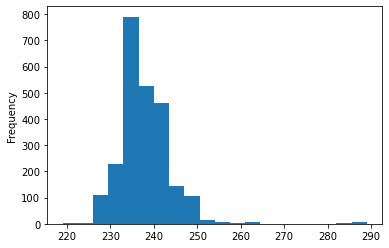

In [9]:
data0['Antibody'].str.len().plot(kind='hist',bins=20)

It is necessary to check the very long sequence over 280 and below 225.

In [10]:
data0.loc[data0['Antibody'].str.len()>=280,'Antibody']

1236    ['EVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
1237    ['EVQLRESGPSLVQPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
1631    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
1745    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
1752    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPEKA...
2216    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
2217    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
2218    ['QVQLRESGPSLVKPSQTLSLTCTASGLSLSDKAVGWVRQAPGKA...
2219    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
2220    ['QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKA...
Name: Antibody, dtype: object

In [11]:
len(data0.loc[data0['Antibody'].str.len()>=280,'Antibody'])

10

In [12]:
data0.loc[data0['Antibody'].str.len()<=225,'Antibody']

111     ['SGGGLVKPAGSLKLSCAASGFTFSSYYMYWVRQTPDKRLEWVAT...
1264    ['QTLSLTCSVTGDSVTSGYWSWIRQFPGNKLDYMGYISYRGSTYY...
2044    ['QIQLVQSGPELKKPGETVKISCKASGYTFTDYSMHWVKQAPGKG...
2049    ['QVQLMESGPELKKPGETVKISCKASGYTFTDYSMHWVKQAPGKG...
2363    ['DVQLVESGGGVVRPGESLTLSCTASGFTFTSSTMNWVRQAPGEG...
Name: Antibody, dtype: object

Amino acids in this dataset only contain 20 types. Each letter represents a type of amino acid within the set (ARNDCEQGHILKMFPSTWYV).
![title](img/The-amino-acids-and-their-three-letter-and-one-letter-codes.png)

In [13]:
data0['Antibody'].str.match('([ARNDCEQGHILKMFPSTWYV]+)')

0       False
1       False
2       False
3       False
4       False
        ...  
2404    False
2405    False
2406    False
2407    False
2408    False
Name: Antibody, Length: 2409, dtype: bool

It is strange that none of them match the 20 amino acid sequence. Lets take the first one to analyze what happened?

In [14]:
data0['Antibody'][0]

"['EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLEWIGWIDPEIGDTEYVPKFQGKATMTADTSSNTAYLQLSSLTSEDTAVYYCNAGHDYDRGRFPYWGQGTLVTVSA', 'DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKLMIYSASNRYTGVPDRFTGSGSGTDFTLTISNMQSEDLADYFCQQYSSYPLTFGAGTKLELK']"

The antibody sequence contains two parts, hevay chain and light chain. We need to check duplicates and extract two chains.

## 6.Check Duplicates

In [15]:
sum(data0['Antibody'].duplicated())

817

In [16]:
data0.iloc[11].Antibody


"['QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGRGLEWIGRIDPNSGGTKYNEKFKSKATLTVDKPSSTAYMQLSSLTSEDSAVYYCARYDYYGSSYFDYWGQGTTVTVSS', 'AVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLFTGLIGGTNNRAPGVPARFSGSLIGNKAALTITGAQTEDEAIYFCALWYSNHWVFGGGTKLTVL']"

In [17]:
data0.iloc[13].Antibody

"['QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGRGLEWIGRIDPNSGGTKYNEKFKSKATLTVDKPSSTAYMQLSSLTSEDSAVYYCARYDYYGSSYFDYWGQGTTVTVSS', 'AVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLFTGLIGGTNNRAPGVPARFSGSLIGNKAALTITGAQTEDEAIYFCALWYSNHWVFGGGTKLTVL']"

In [18]:
data0.iloc[11].Antibody_ID

'1a6u'

In [19]:
data0.iloc[13].Antibody_ID

'1a6w'

In [20]:
data0.iloc[11].Y

0

In [21]:
data0.iloc[13].Y

0

In [22]:
data0 = data0[~data0['Antibody'].duplicated()]

The antibody has two parts, the first part is heavy chain of the antibody and second part is light chain. So we need to split these two parts.

## 7.Extract Heavy Chain and Light Chain

In [23]:
X_heavy = data0['Antibody'].str.findall('[ARNDCEQGHILKMFPSTWYV]+').apply(lambda x: x[0])
X_light = data0['Antibody'].str.findall('[ARNDCEQGHILKMFPSTWYV]+').apply(lambda x: x[1])
Y = data0['Y']

Text(0.5, 0, 'Length of heavy chain of antibodies')

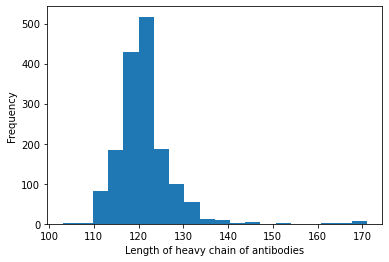

In [24]:
ax = X_heavy.str.len().plot(kind='hist',bins=20)
plt.xlabel('Length of heavy chain of antibodies')

Text(0.5, 0, 'Length of light chain of antibodies')

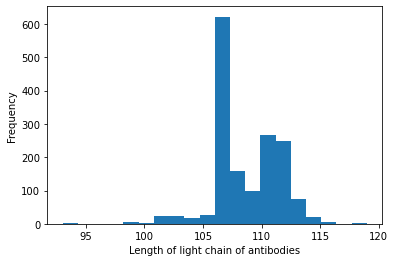

In [25]:
ax = X_light.str.len().plot(kind='hist',bins=20)
plt.xlabel('Length of light chain of antibodies')

In [26]:
X_heavy[X_heavy.str.len()>=160]

1236    EVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
1237    EVQLRESGPSLVQPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
1631    QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
1752    QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPEKALE...
2216    QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
2217    QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
2218    QVQLRESGPSLVKPSQTLSLTCTASGLSLSDKAVGWVRQAPGKALE...
2219    QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
2220    QVQLRESGPSLVKPSQTLSLTCTASGFSLSDKAVGWVRQAPGKALE...
Name: Antibody, dtype: object

In [27]:
X_heavy[X_heavy.str.len()<=110]

111     SGGGLVKPAGSLKLSCAASGFTFSSYYMYWVRQTPDKRLEWVATIS...
1264    QTLSLTCSVTGDSVTSGYWSWIRQFPGNKLDYMGYISYRGSTYYNP...
1350    EVQVVESGGGVVQPGRSLRLSCTASGFTFSNFAMGWVRQAPGKGLE...
1606    QSVEESGGRLVTPGTPLTLTCTVSGFSLSSNAINWVRQAPGKGLEW...
Name: Antibody, dtype: object

In [28]:
X_light[X_light.str.len()>=115]

543     QLVLTQSSSASFSLGASAKLTCTLSSQHSTYTIEWYQQQPLKPPKY...
618     QLVLTQSSSASFSLGASAKLTCTLSRQHSTYTIEWYQQQPLKPPRY...
765     QLVLTQSSSASFSLGASAKLTCTLSSQHSTYTIEWYQQQPLKPPKY...
963     DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKP...
964     DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKP...
984     QLVLTQSSSASFSLGASAKLTCTLNSQHSTYTIEWYQQQPLKPPKY...
1198    QLVLTQSSSASFSLGASAKLTCTLSRQHSTYTIEWYQQQPLKPPKF...
1255    QPVLTQPTSLSASPGASARLSCTLSSGFTVGRYSIFWYQQKPGSPP...
1256    EPVLTQPTFLSASPGASARLSCTLSSGINVGSYSIFWYQQKPGSPP...
1338    DIVMTQSPSSLAMSVGQKVTMSCKSSQSLLNSNNQKNYLAWYQQKP...
1642    QLVLTQSSSASFSLGASAKLTCTLSSQHSTYTIDWYQQQPLKPPKY...
1661    QSALTQPASVSGSPGQSISISCTGTSSDIGGYKYVSWYQQHPGRAP...
1782    QLVLTQSSSASFSLGASAKLTCTLSSQHSTYTIEWYQQQPLKPPKF...
1816    ESALTQPASVSGSPGQSISISCTGTSSDIGGYKYVSWYQQHPGRAP...
1982    DIVMTQSPESLAVSLGERATINCKSSQSVLYSSRSDNKDYLAWYQQ...
2237    QLVLTQSSSASFSLGASAKLTCTLSRQHSTYTIEWYQQQPLKPPKY...
2284    LPVLTQPPSSSASPGESARLTCTLPSDINVGSYNIYWYQQKPGSPP...
2286    LPVLTQ

In [29]:
X_light[X_light.str.len()<=95]

2049    DIVLTQSPASLAVSLGQRATISCRASQSVSTSYMHWYQQKPGQPPR...
Name: Antibody, dtype: object

## Reference
Huang, K., Fu, T., Gao, W., Zhao, Y., Roohani, Y., Leskovec, J., ... & Zitnik, M. (2021). Therapeutics Data Commons: Machine learning datasets and tasks for drug discovery and development. arXiv preprint arXiv:2102.09548.

Chen, X., Dougherty, T., Hong, C., Schibler, R., Zhao, Y. C., Sadeghi, R., ... & Kerman, I. (2020). Predicting antibody developability from sequence using machine learning. bioRxiv.